# Project - Forecasting NYSE-100

In developed countries stock prices is an important feature to analyze the economic condition due to financial statements but it also shows
the investing appetite of the both small and large investors. 

Future expectation of the economic agents is not an easy feature to foreseen and investing behaviour is an important factor to determine expectations
so stock markets are a valuable factor to determine the expectations. But analyzing the stock markets is not an easy issue due to complex dynamics 
of the markets caused by investing reasons. 

Investors have different motivations to make investments on these markets such as;

- Keeping their wealth on secure and profitable assets      
- Chasing speculative incomes which were mostly short term        
- Long-time investing for retirement plan                      
- Secondary income

Different motivations of the investors and also irrational decision making due to unsufficient information increases the complexity of the data so
capable models those can handle nonlinear dynamics in the data must be used. Machine learning models are comonly used to make analysis and predictions
for this kind of data. In my project we will be appliying different kind of machine learning models such as Random Forest, XGBoost, catboost and
ElasticNet. These algorithms are chosen due to their proven performance on regression problems and simplicty on tuning

Project has 4 sections

1-  Defining the problem        
2-  Data            
3-  Evaluation of the model               
4-  Features

### 1 - Defining the Problem

The presence of stock markets is to give the companies to finance their activity (mostly large investments) and give the fund holders whether individual investors or large companies to utilize their sources with these companies shares. So main issue must be the economic activity according to logic of stock markets. 

Every stock market has its own dynamics. On developing countries because of lack of funds stock market is not deep enough so it can be manipulated with big fund owners so reliability is limited. In this kind of markets, preculative income motives are in charge so foreign fund owners such as hedge funds or other financial companies do not prefer this kind of markets. 

In this problem I have selected New York Stock exchange and I will be analyzing the NYSE-100 with macroeconomic datas whether their good features to forecast the stock market returns or not. I have selected the US stock market because it is big enough not to be manipulated easily by stock holders.

### 2 - Data

Our dependent variable (Label) is NYSE-100 data which as an stock price index (abbreviated as price) of top 100 companies operating in United States.

Independent Variables (Features) are;

- Market yield (10 years) abbreviated as dgs                            
- Financial Uncertainity Index                          
- Macro Uncertainity Index                                             
- Real Uncertainity Index                                     
- Industrial Production Index
- Unemployment Rate (%)

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## First we are importing our dataset as Pandas Dataframe

da_parser=lambda x:pd.to_datetime(x, format="%b-%y")
NYSE=pd.read_excel("NYSE_100.xlsx", parse_dates=["Date"], date_parser=da_parser)
DGS=pd.read_excel("DGS.xlsx", parse_dates=["Date"], date_parser=da_parser)
Fin_Unc=pd.read_excel("FinUnc.xlsx", parse_dates=["Date"], date_parser=da_parser)
Mac_Unc=pd.read_excel("MacroUncertaintyToCirculate.xlsx", parse_dates=["Date"], date_parser=da_parser)
Real_Unc=pd.read_excel("RealUnc.xlsx", parse_dates=["Date"], date_parser=da_parser)
Ind_Pro=pd.read_excel("IND_Pro.xlsx", parse_dates=["Date"], date_parser=da_parser)
Un_R=pd.read_excel("Unemp_Rate.xlsx", parse_dates=["Date"], date_parser=da_parser)

In [4]:
from functools import reduce

In [5]:
## Then we are gathering the data in single dataframe

total=[NYSE, DGS, Fin_Unc, Mac_Unc, Real_Unc, Ind_Pro, Un_R]
data=reduce(lambda all, ts: pd.merge(all, ts, on="Date", how="left"), total)
data

,Date,Price,Market_Yield_10Y,FinUnc_1,MacUnc_1,RealUnc_1,IND_Pro,UN_Rate
0,1996-02-01,3127.5,5.805500,0.685925,0.607327,0.645298,73.6207,5.5
1,1996-03-01,3150.6,6.268571,0.699689,0.594161,0.617963,73.5141,5.5
2,1996-04-01,3162.0,6.511364,0.723685,0.575936,0.592436,74.2491,5.6
3,1996-05-01,3252.8,6.736818,0.745209,0.560632,0.563770,74.8142,5.6
4,1996-06-01,3288.5,6.912000,0.775306,0.551283,0.547802,75.3726,5.3
...,...,...,...,...,...,...,...,...
339,2024-05-01,15251.6,4.482273,0.927511,0.643692,0.655030,103.2156,4.0
340,2024-06-01,15358.5,4.305263,0.913963,0.637405,0.656229,103.2798,4.1
341,2024-07-01,15913.2,4.248636,NaN,NaN,NaN,102.3058,4.3
342,2024-08-01,16537.0,3.870909,NaN,NaN,NaN,103.1389,4.2


In [6]:
## We have found the data from different sources so finishing periods are different so we are equaling the data

data=data.dropna()

In [7]:
"""The data can have unit roots and presence of unit root is a strong factor to make analysis harder son first we will investigate 
the presence of unit root in the data with Augmented Dickey Fuller Test"""

from statsmodels.tsa.stattools import adfuller

In [8]:
num_col=data.select_dtypes(include="number").columns

In [9]:
def adf_st(x):
    result=adfuller(x)
    critical_values={key: value for key, value in result[4].items()}
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': critical_values
    }

adf_table={}

for column in data[num_col].columns:
    adf_table[column]=adf_st(data[column])

test_results=pd.DataFrame(adf_table).T
print(test_results)

                 ADF Statistic   p-value  \
Price                 0.202121   0.97238   
Market_Yield_10Y     -2.038517  0.269944   
FinUnc_1             -3.219494  0.018884   
MacUnc_1             -3.460392  0.009065   
RealUnc_1            -2.370009  0.150381   
IND_Pro              -2.844511  0.052192   
UN_Rate              -3.036806  0.031597   

                                                    Critical Values  
Price             {'1%': -3.450141065277327, '5%': -2.8702588462...  
Market_Yield_10Y  {'1%': -3.449846029628477, '5%': -2.8701292813...  
FinUnc_1          {'1%': -3.449846029628477, '5%': -2.8701292813...  
MacUnc_1          {'1%': -3.4499043309021955, '5%': -2.870154885...  
RealUnc_1         {'1%': -3.4507587628808922, '5%': -2.870530068...  
IND_Pro           {'1%': -3.449846029628477, '5%': -2.8701292813...  
UN_Rate           {'1%': -3.4497304638968043, '5%': -2.870078527...  


ADF test is applied to numerical columns and according to the results only Financial and Macro uncertainity indexes are stationary
so we will use t/t-1 method to get rid of unit roots. The mentioned method will be utilized to stationary time series because of integrity of the data

In [10]:
## A copy of original dataframe is prepared for t/t-1 transformation

data_ret=data.copy()
data_ret

,Date,Price,Market_Yield_10Y,FinUnc_1,MacUnc_1,RealUnc_1,IND_Pro,UN_Rate
0,1996-02-01,3127.5,5.805500,0.685925,0.607327,0.645298,73.6207,5.5
1,1996-03-01,3150.6,6.268571,0.699689,0.594161,0.617963,73.5141,5.5
2,1996-04-01,3162.0,6.511364,0.723685,0.575936,0.592436,74.2491,5.6
3,1996-05-01,3252.8,6.736818,0.745209,0.560632,0.563770,74.8142,5.6
4,1996-06-01,3288.5,6.912000,0.775306,0.551283,0.547802,75.3726,5.3
...,...,...,...,...,...,...,...,...
336,2024-02-01,15081.3,4.207500,0.975385,0.664322,0.684056,102.7267,3.9
337,2024-03-01,15624.8,4.208500,0.953394,0.648453,0.660736,102.5186,3.8
338,2024-04-01,14994.4,4.539091,0.950545,0.643374,0.653718,102.4479,3.9
339,2024-05-01,15251.6,4.482273,0.927511,0.643692,0.655030,103.2156,4.0


In [11]:
## We are using t/t-1 transformation (Percentage Return) to data

num_col=data_ret.select_dtypes(include="number").columns
data_ret[num_col]=data_ret[num_col]/data_ret[num_col].shift(1)
data_ret

,Date,Price,Market_Yield_10Y,FinUnc_1,MacUnc_1,RealUnc_1,IND_Pro,UN_Rate
0,1996-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-03-01,1.007386,1.079764,1.020066,0.978320,0.957640,0.998552,1.000000
2,1996-04-01,1.003618,1.038732,1.034297,0.969328,0.958692,1.009998,1.018182
3,1996-05-01,1.028716,1.034625,1.029742,0.973427,0.951613,1.007611,1.000000
4,1996-06-01,1.010975,1.026004,1.040387,0.983324,0.971675,1.007464,0.946429
...,...,...,...,...,...,...,...,...
336,2024-02-01,1.041001,1.036816,0.973934,0.985969,0.982646,1.012255,1.054054
337,2024-03-01,1.036038,1.000238,0.977454,0.976112,0.965909,0.997974,0.974359
338,2024-04-01,0.959654,1.078553,0.997012,0.992166,0.989378,0.999310,1.026316
339,2024-05-01,1.017153,0.987482,0.975767,1.000494,1.002008,1.007494,1.025641


In [12]:
data_ret.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 340
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              341 non-null    datetime64[ns]
 1   Price             340 non-null    float64       
 2   Market_Yield_10Y  340 non-null    float64       
 3   FinUnc_1          340 non-null    float64       
 4   MacUnc_1          340 non-null    float64       
 5   RealUnc_1         340 non-null    float64       
 6   IND_Pro           340 non-null    float64       
 7   UN_Rate           340 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 24.0 KB


In [13]:
## First row is deleted because it is empty due to transformation

data_ret=data_ret.dropna()
data_ret

,Date,Price,Market_Yield_10Y,FinUnc_1,MacUnc_1,RealUnc_1,IND_Pro,UN_Rate
1,1996-03-01,1.007386,1.079764,1.020066,0.978320,0.957640,0.998552,1.000000
2,1996-04-01,1.003618,1.038732,1.034297,0.969328,0.958692,1.009998,1.018182
3,1996-05-01,1.028716,1.034625,1.029742,0.973427,0.951613,1.007611,1.000000
4,1996-06-01,1.010975,1.026004,1.040387,0.983324,0.971675,1.007464,0.946429
5,1996-07-01,0.959434,0.993266,1.043993,0.992178,0.983300,1.000016,1.037736
...,...,...,...,...,...,...,...,...
336,2024-02-01,1.041001,1.036816,0.973934,0.985969,0.982646,1.012255,1.054054
337,2024-03-01,1.036038,1.000238,0.977454,0.976112,0.965909,0.997974,0.974359
338,2024-04-01,0.959654,1.078553,0.997012,0.992166,0.989378,0.999310,1.026316
339,2024-05-01,1.017153,0.987482,0.975767,1.000494,1.002008,1.007494,1.025641


In [14]:
## We applied ADF Test and according to the results all the data is stationary now.

def adf_st(x):
    result=adfuller(x)
    critical_values={key: value for key, value in result[4].items()}
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': critical_values
    }

adf_table={}

for column in data_ret[num_col].columns:
    adf_table[column]=adf_st(data_ret[column])

test_results=pd.DataFrame(adf_table).T
print(test_results)

                 ADF Statistic p-value  \
Price               -18.461225     0.0   
Market_Yield_10Y    -11.599947     0.0   
FinUnc_1             -8.590777     0.0   
MacUnc_1             -7.663347     0.0   
RealUnc_1             -8.53541     0.0   
IND_Pro             -13.779186     0.0   
UN_Rate             -17.133844     0.0   

                                                    Critical Values  
Price             {'1%': -3.4497880749874628, '5%': -2.870103829...  
Market_Yield_10Y  {'1%': -3.449846029628477, '5%': -2.8701292813...  
FinUnc_1          {'1%': -3.449846029628477, '5%': -2.8701292813...  
MacUnc_1          {'1%': -3.449962981927952, '5%': -2.8701806424...  
RealUnc_1         {'1%': -3.4499043309021955, '5%': -2.870154885...  
IND_Pro           {'1%': -3.449846029628477, '5%': -2.8701292813...  
UN_Rate           {'1%': -3.4497880749874628, '5%': -2.870103829...  


In [15]:
import scipy.stats as stats

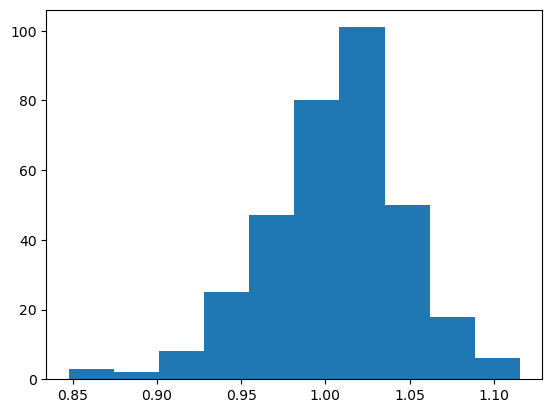

In [16]:
fig, ax=plt.subplots()
ax.hist(data_ret["Price"]);
plt.show()

It seems that the target variable (Price of NYSE-100) is not distrubuted normally

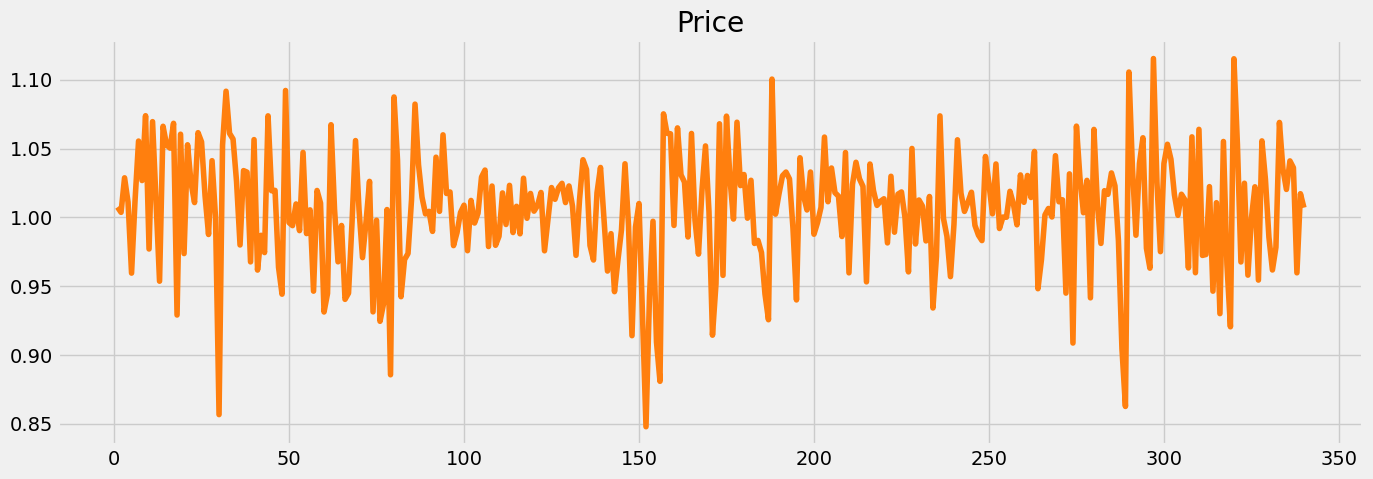

In [17]:
color_pal=sns.color_palette()
plt.style.use("fivethirtyeight")
data_ret["Price"].plot(style="-", figsize=(15,5), color=color_pal[1], title="Price")
plt.show();

The target variable (label or dependent variable) looks like it has high variance so let's make distribution test to target variable
and to independent variables.

In [18]:
def JBN(x):
    JB_result=stats.jarque_bera(x)
    return {
        "Test Statistic": JB_result.statistic,
        "P-Value":JB_result.pvalue
    }

JB_table={}

for column in data_ret[num_col].columns:
    JB_table[column]=JBN(data_ret[column])

JBtest_results=pd.DataFrame(JB_table).T
print(JBtest_results)

                  Test Statistic       P-Value
Price               3.067522e+01  2.182537e-07
Market_Yield_10Y    2.823514e+02  4.877210e-62
FinUnc_1            1.718677e+01  1.853277e-04
MacUnc_1            2.088163e+03  0.000000e+00
RealUnc_1           3.035161e+03  0.000000e+00
IND_Pro             6.790317e+04  0.000000e+00
UN_Rate             1.179338e+06  0.000000e+00


According to Jarque Berra normality test, all the variables both target and features do not have normal distribution.

Next we will investigate the linearity of the data.

In [19]:
### BDS test is the one of the best known test to analyze the data whether it is linear or not

from statsmodels.tsa.stattools import bds

In [20]:
def BDS(x):
    BDS_result=bds(x)
    return {
        "Test Statistic": BDS_result[0],
        "P-Value":BDS_result[1]
    }

BDS_table={}

for column in data_ret[num_col].columns:
    BDS_table[column]=BDS(data_ret[column])

BDStest_results=pd.DataFrame(BDS_table).T
print(BDStest_results)

                      Test Statistic                 P-Value
Price              5.690298836718928  1.2681723325749932e-08
Market_Yield_10Y   5.623397310371237  1.8723808567006268e-08
FinUnc_1          19.570032421436167  2.7850432250378806e-85
MacUnc_1          16.661228808689128  2.5081786268080213e-62
RealUnc_1         14.751905279907492   2.990999767221835e-49
IND_Pro             9.00592808018748  2.1384930739458916e-19
UN_Rate            9.046469588528016  1.4766532281989365e-19


The result of the BDS test shows that all the varibles are nonlinear, it will be a complete nonlinear showdown

In [21]:
"""
Let's add a variable for data mining  - transaction month can be important because in some periods of the year,
economic agents choices can differantiate
"""

data_ret["Trans_Month"] = data_ret.Date.dt.month
data_ret

,Date,Price,Market_Yield_10Y,FinUnc_1,MacUnc_1,RealUnc_1,IND_Pro,UN_Rate,Trans_Month
1,1996-03-01,1.007386,1.079764,1.020066,0.978320,0.957640,0.998552,1.000000,3
2,1996-04-01,1.003618,1.038732,1.034297,0.969328,0.958692,1.009998,1.018182,4
3,1996-05-01,1.028716,1.034625,1.029742,0.973427,0.951613,1.007611,1.000000,5
4,1996-06-01,1.010975,1.026004,1.040387,0.983324,0.971675,1.007464,0.946429,6
5,1996-07-01,0.959434,0.993266,1.043993,0.992178,0.983300,1.000016,1.037736,7
...,...,...,...,...,...,...,...,...,...
336,2024-02-01,1.041001,1.036816,0.973934,0.985969,0.982646,1.012255,1.054054,2
337,2024-03-01,1.036038,1.000238,0.977454,0.976112,0.965909,0.997974,0.974359,3
338,2024-04-01,0.959654,1.078553,0.997012,0.992166,0.989378,0.999310,1.026316,4
339,2024-05-01,1.017153,0.987482,0.975767,1.000494,1.002008,1.007494,1.025641,5


In [22]:
## We will be setting date as index to continue our analysis

data_ret=data_ret.set_index("Date")
data_ret

,Price,Market_Yield_10Y,FinUnc_1,MacUnc_1,RealUnc_1,IND_Pro,UN_Rate,Trans_Month
Date,,,,,,,,
1996-03-01,1.007386,1.079764,1.020066,0.978320,0.957640,0.998552,1.000000,3
1996-04-01,1.003618,1.038732,1.034297,0.969328,0.958692,1.009998,1.018182,4
1996-05-01,1.028716,1.034625,1.029742,0.973427,0.951613,1.007611,1.000000,5
1996-06-01,1.010975,1.026004,1.040387,0.983324,0.971675,1.007464,0.946429,6
1996-07-01,0.959434,0.993266,1.043993,0.992178,0.983300,1.000016,1.037736,7
...,...,...,...,...,...,...,...,...
2024-02-01,1.041001,1.036816,0.973934,0.985969,0.982646,1.012255,1.054054,2
2024-03-01,1.036038,1.000238,0.977454,0.976112,0.965909,0.997974,0.974359,3
2024-04-01,0.959654,1.078553,0.997012,0.992166,0.989378,0.999310,1.026316,4


In [23]:
## For correct lag selection we are appliying var model

import statsmodels.api as sta
from statsmodels.tsa.api import VAR

In [24]:
## Appliying VAR model

model_VAR=VAR(data_ret);

C:\Users\bahri\Desktop\Python\Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
""" 
Data show nonlinear dynamics so bic is selected instead of aic because Bayesian Information Criteria gives better information on nonlinear series
"""
lag_order = model_VAR.select_order(maxlags=5) 
print(lag_order.selected_orders)

{'aic': 5, 'bic': 1, 'hqic': 1, 'fpe': 5}


### 3 - Evaluation of the Models

In [26]:
## Window sliding function is prepared for using lagged values of the features.

def sliding_data(data_ret, window_size=1):
    data_to_np=data_ret.to_numpy()
    X=[]
    y=[]
    for i in range(len(data_to_np)-window_size):
        row=data_to_np[i:i+window_size].flatten()
        X.append(row)
        label=data_to_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [27]:
X,y=sliding_data(data_ret, 1)
X.shape, y.shape

((339, 8), (339,))

In [28]:
## Train - test split   -- %80-%20 percentage is most commonly used split ratio so we are using the same percentage.

X_train, y_train= X[:272], y[:272]
X_test, y_test=X[272:], y[272:]

In [29]:
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training RMSE": rmse(y_train, train_preds),
              "Test RMSE": rmse(y_test, test_preds),
              "Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, test_preds)}
    return scores

In [31]:
## First Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
np.random.seed(4)
modelRFR=RandomForestRegressor(n_estimators=200)

modelRFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [32]:
np.random.seed(4)
show_scores(modelRFR)

{'Training RMSE': 0.014815111957253735,
 'Test RMSE': 0.056282286920403025,
 'Training MAE': 0.011186449799924692,
 'Test MAE': 0.04322814446667894}

In [33]:
## Second XG Boost Regressor

import xgboost as xgb
np.random.seed(4)
modelXGB=xgb.XGBRegressor(n_estimators=200, reg_lambda=0.8)
modelXGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
np.random.seed(4)
show_scores(modelXGB)

{'Training RMSE': 0.0008756190118961929,
 'Test RMSE': 0.05940299838947181,
 'Training MAE': 0.0005995940326557534,
 'Test MAE': 0.04492312697078983}

In [35]:
## Third, Catboost Regressor

from catboost import CatBoostRegressor

In [36]:
np.random.seed(4)
modelCB = CatBoostRegressor(verbose=False)

modelCB.fit(X_train, y_train)

In [37]:
np.random.seed(4)
show_scores(modelCB)

{'Training RMSE': 0.004610867297481537,
 'Test RMSE': 0.0532965633115073,
 'Training MAE': 0.0034429317265439615,
 'Test MAE': 0.04270951434625457}

In [38]:
## And finally Support Vector Machine Regression

from sklearn.svm import SVR

In [39]:
np.random.seed(4)
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)

SVR()

In [40]:
show_scores(modelSVR)

{'Training RMSE': 0.04501120250325127,
 'Test RMSE': 0.053834969782483144,
 'Training MAE': 0.036229350300803834,
 'Test MAE': 0.04494469505631904}

In [41]:
## Let's show all the results in a single dataframe

results = {
    'Model': ['Random Forest', 'XGBoost', 'CatBoost', 'SVR'],
    'Scores': [
        show_scores(modelRFR),
        show_scores(modelXGB),
        show_scores(modelCB),
        show_scores(modelSVR)
    ]
}

scores_comparison = pd.DataFrame(results)

scores_comparison = pd.concat([scores_comparison.drop(['Scores'], axis=1), scores_comparison['Scores'].apply(pd.Series)], axis=1)

print(scores_comparison)

           Model  Training RMSE  Test RMSE  Training MAE  Test MAE
0  Random Forest       0.014815   0.056282      0.011186  0.043228
1        XGBoost       0.000876   0.059403      0.000600  0.044923
2       CatBoost       0.004611   0.053297      0.003443  0.042710
3            SVR       0.045011   0.053835      0.036229  0.044945


The selected period had an extraordinary dynamic, Covid-19 pandemic era. Models had to deal with both before and after pandemic features so the methods exhibits overfitting because dynamics has changed in the mentioned period. 

Catboost showed the best performance according to the test RMSE and MAE results so we will be proceeding with the model.

In [42]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [45]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
rmse_scorer = make_scorer(rmse, greater_is_better=False)

param_grid_CB = {"iterations": [200, 400],  
    "learning_rate": [0.01, 0.04, 0.08], 
    "depth": [2, 9, 15],  
    "l2_leaf_reg": [2, 6, 10],  
    "bagging_temperature": [0, 0.5, 1.0]}

TSSplitCV = TimeSeriesSplit(n_splits=5)

grid_search_CatBoost = GridSearchCV(estimator=modelCB, param_grid=param_grid_CB, scoring=rmse_scorer, cv=TSSplitCV)

grid_search_CatBoost.fit(X_train, y_train)

print("Best Parameters:", grid_search_CatBoost.best_params_)

BM_CB = grid_search_CatBoost.best_estimator_

y_pred = BM_CB.predict(X_test)

RMSE=rmse(y_test, y_pred)
print("Test RMSE:", RMSE)

Best Parameters: {'bagging_temperature': 0, 'depth': 2, 'iterations': 400, 'l2_leaf_reg': 2, 'learning_rate': 0.01}
Test RMSE: 0.0544121624704536


The Catboost's performance deteriorated after the hyperparameter tuning so we will proceed with the base model of Catboost

In [46]:
# Lets save the base model of catboost

import joblib

joblib.dump(modelCB, 'modelCB.joblib')

['modelCB.joblib']

### 4 - Features

I have selected 6 different features and added an additional one to make a forecast using different machine learning methods but it is important
to understand which features are more efficient on analysis so in this section I will be analyzing the features and shows their importance.

Normally, there are different methods to reveal the feature importance such as correlation matrix but I will prefer a better way to analyze the data
that exhibits nonlinear dynamics.

In [47]:
from catboost import Pool

            Feature  Importance
0          FinUnc_1    8.142471
1  Market_Yield_10Y   10.098877
2           IND_Pro   11.043080
3             Price   11.366821
4         RealUnc_1   13.263352
5          MacUnc_1   13.726358
6           UN_Rate   13.934026
7       Trans_Month   18.425015


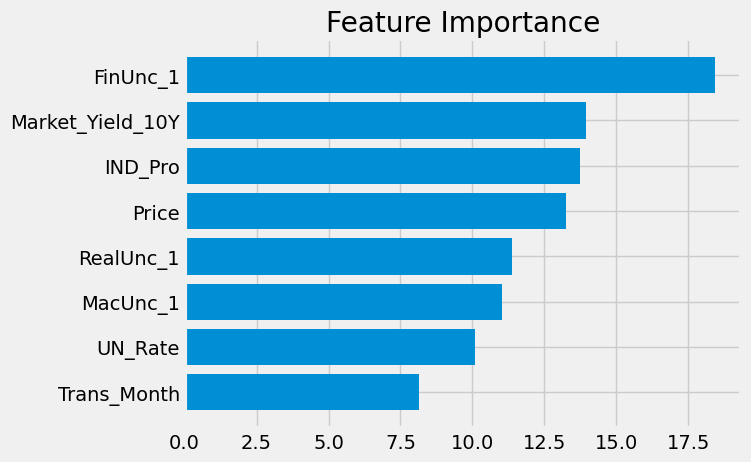

In [50]:
feature_importance=modelCB.feature_importances_
feat_names=["Price", "Market_Yield_10Y", "FinUnc_1", "MacUnc_1", "RealUnc_1", "IND_Pro", "UN_Rate", "Trans_Month"]
sorted_idx=np.argsort(feature_importance)
feat_imp_df= pd.DataFrame({'Feature': np.array(feat_names)[sorted_idx][::-1], 'Importance': feature_importance[sorted_idx]})
print(feat_imp_df)

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feat_names)[sorted_idx])
plt.title('Feature Importance')
plt.show()

First of all, all the coefficients are 1st lagged values of the features. The results showed that almost all of the features's coefficients are over %10. According to the feature importance selection results and RMSE/MAE results model showed a satisfiying performance. I have add only simple feature derived from the data so a better data mining process will imporve the performance of the model.

Also 2 most important features are financial uncertainity and market yield data so we can comment that financial data is more important than macro economicdata in forecasting NYSE-100. 

In this project I used both financial and macro economic variables to forecast a highly volatile NYSE-100 data and my opinion that inplementing financial data and using data mining more can provide a better forecasting model